# 課題１

## 式を実装

### 必要なライブラリをインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### パラメータの設定

In [311]:
#parameter
a_c = 6.25             #台車駆動系のパラメータ
b_c = 4.36             #台車駆動系のパラメータ
m_p = 1.07 * 10 ** -1  #振り子の質量[kg]
l_p = 2.30 * 10 ** -1  #振り子の軸から重心までの長さ[m]
L_p = 3.80 * 10 ** -1  #振り子の全長[m]
J_p = 1.59 * 10 ** -3  #振り子の重心周りの慣性モーメント[kg m^2]
mu_p = 2.35 * 10 ** -4 #振り子の粘性摩擦係数 [kg m^2/s]
g = 9.81               #重力加速度[m/s^2]

### 式１　加速度を求める式

In [4]:
def Calculate_ddz(dz, v):
    '''
    dz : velocity
    v : control input
    ddz : acceleration
    '''
    return a_c * dz + b_c * v

### 式２　各加速度を求める指揮

In [283]:
'''def formula2(q):
    m_p * l_p * np.cos(q) * ddz + (J_p + m_p * l_p**2) * ddq = -mu_p * dq + m_p * g * l_p * np.sin(q)
    return 0
'''
def Calculate_ddq(dq, q, ddz):
    '''
    q : angle
    dq : angular velocity
    ddz : acceleration
    ddq : angular acceleration
    '''    
  return (- mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz)/(J_p + m_p * l_p**2)


### 角度($-\pi$ ~ $\pi$)

In [333]:
def radian(q):
  #-pi ~ pi
  return (q % (2 * np.pi)) if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi

### P制御

In [281]:
kp = 0.1
pq = 0.0
def P_function(kp, pz, z):
  return kp * (z - pz)

## 2. データ収集　ランダムな初期値からランダムな制御入力

In [152]:
h = 0.02
def sampling(dz,z,dq,q):
  v = P_function(kp,pq,q)
  ddz = Calculate_ddz(dz,v)
  dz -= ddz * h
  z -= dz * h
  ddq = Calculate_ddq(dq, q, ddz)
  dq -= ddq * h
  q -= dq * h
  q = radian(q)
  return v,z,q

In [153]:
def random_sampling():
  q = np.random.uniform(-np.pi,np.pi)
  dq = np.random.uniform(-1.0,1.0)
  z = np.random.uniform(-1.0,1.0)
  dz = np.random.uniform(-1.0,1.0)
  return sampling(dz,z,dq,q)

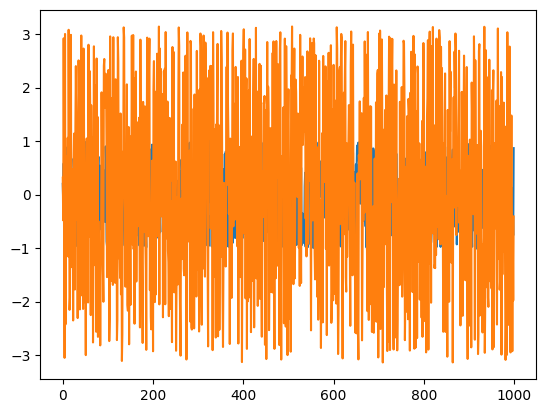

In [154]:
np.random.seed(0)
times = 1000
sample_z = []
sample_q = []
sample_times = np.arange(0,times)

for _ in sample_times:
  v,z,q = random_sampling()
  sample_z.append(z)
  sample_q.append(q)

plt.plot(sample_times,sample_z)
plt.plot(sample_times,sample_q)
plt.show()

## 3. データ収集　指定された初期状態からランダムな制御入力

### 初期値

In [155]:
#initial
q0 = np.pi
dq0 = 0
z0 = 0
dz0 = 0

In [156]:
def initial_sampling():
  q0 = np.pi
  dq0 = 0.0
  z0 = 0.0
  dz0 = 0.0
  return sampling(dz,z,dq,q)

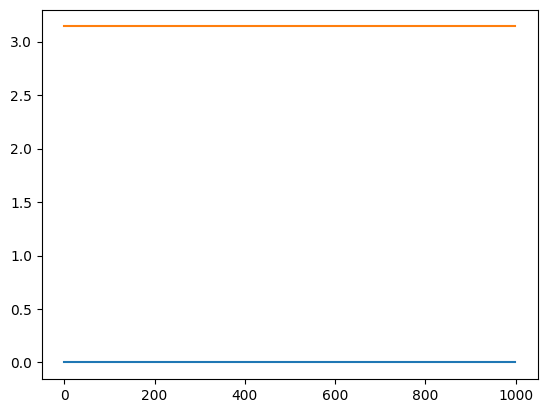

In [157]:
np.random.seed(0)
times = 1000
sample_z = []
sample_q = []
sample_times = np.arange(0,times)

#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity

for _ in sample_times:
  v,z,q = initial_sampling()
  sample_z.append(z)
  sample_q.append(q)

plt.plot(sample_times,sample_z)
plt.plot(sample_times,sample_q)
plt.show()

##　４. MLPを訓練

# Answer

In [327]:
#parameter
a_c = 6.25             #台車駆動系のパラメータ
b_c = 4.36             #台車駆動系のパラメータ
m_p = 1.07 * 10 ** -1  #振り子の質量[kg]
l_p = 2.30 * 10 ** -1  #振り子の軸から重心までの長さ[m]
L_p = 3.80 * 10 ** -1  #振り子の全長[m]
J_p = 1.59 * 10 ** -3  #振り子の重心周りの慣性モーメント[kg m^2]
mu_p = 2.35 * 10 ** -4 #振り子の粘性摩擦係数 [kg m^2/s]
g = 9.81               #重力加速度[m/s^2]

In [328]:
def Calculate_ddq(dq, q, ddz):
  #return (- mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz)/(J_p + m_p * l_p**2)
  return (-mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz) / (J_p + m_p * l_p**2)

In [329]:
h = 0.02
def answer(z,q,dz,dq,ddz,v):
  ddq = Calculate_ddq(dq, q, ddz)
  dq -= ddq * h
  q -= dq * h
  ddz = Calculate_ddz(dz,v)
  dz -= ddz * h
  z -= dz * h
  q = radian(q)
  return z,q,dz,dq,ddz,ddq

In [330]:
contrl = np.genfromtxt('opt_ctrl.csv')

/tmp/ipykernel_2407/958468015.py:3: RuntimeWarning: overflow encountered in double_scalars
  return (-mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz) / (J_p + m_p * l_p**2)
/tmp/ipykernel_2407/3796976277.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (q % (2 * np.pi)) #if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi
/opt/conda/lib/python3.10/site-packages/matplotlib/ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


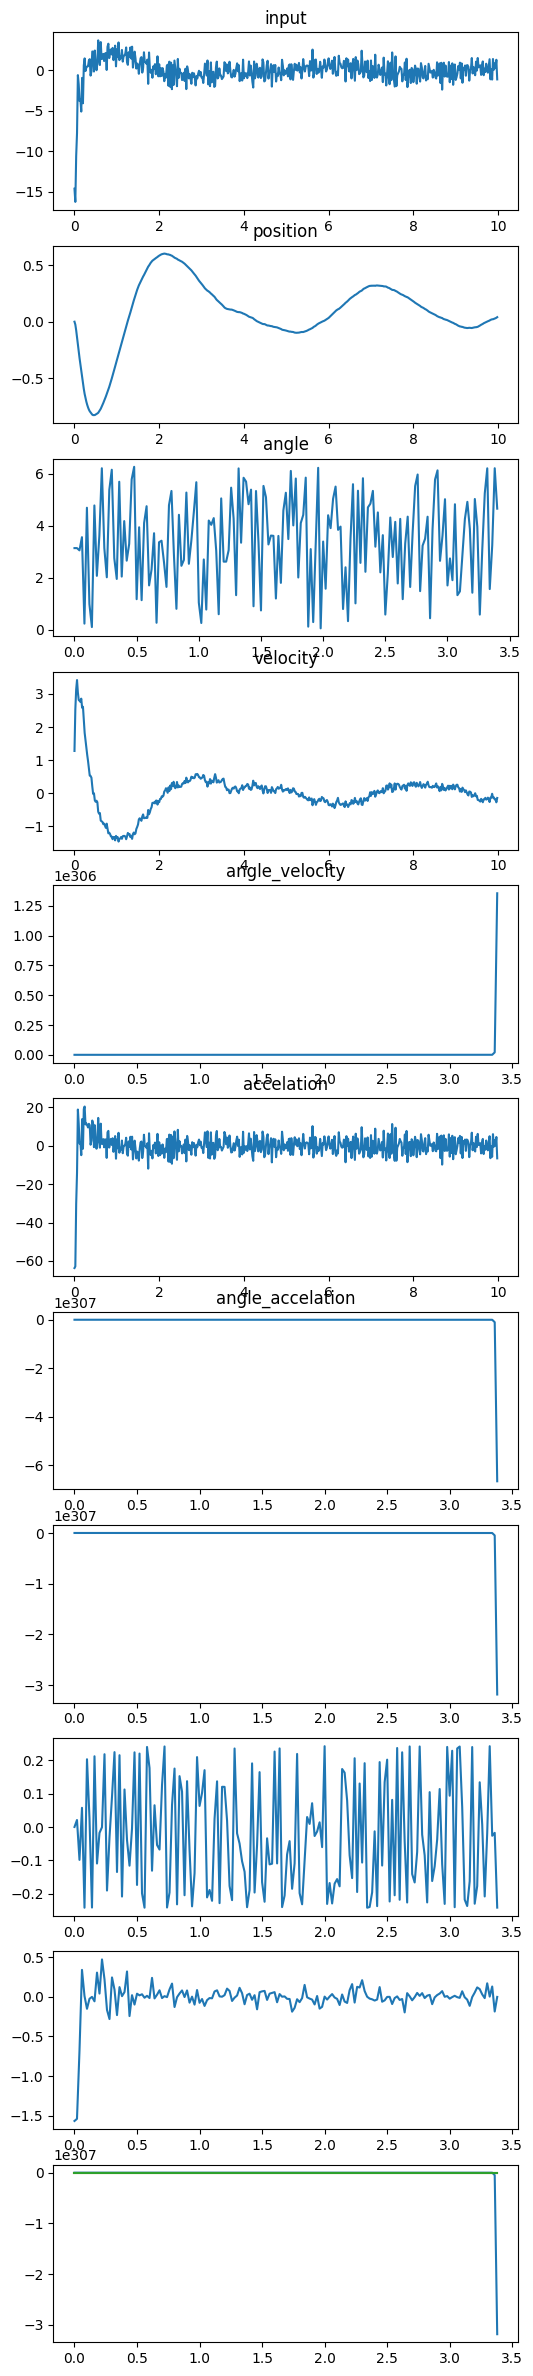

In [331]:
#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
ddz = 0.0

#v=0.0      #External input

p = []
vp = []
ap = []
angle_p = []
angle_vp = []
angle_ap = []
kp = 0.8
pq = np.pi
h = 0.02  #width
t = np.arange(0,10,h)
a = []
b = []
c = []

for v in contrl:
  p.append(z)
  angle_p.append(q)
  z,q,dz,dq,ddz,ddq = answer(z,q,dz,dq,ddz,v)
  a.append(-mu_p*dq)
  b.append(m_p*g*l_p*np.sin(q))
  c.append(-m_p*l_p*np.cos(q)*ddz)
  vp.append(dz)
  angle_vp.append(dq)
  ap.append(ddz)
  angle_ap.append(ddq)

fig = plt.figure(figsize=(6,30))
ax1 = fig.add_subplot(11,1,1)
ax1.plot(t,contrl)
ax1.set_title('input')
ax2 = fig.add_subplot(11,1,2)
ax2.plot(t,p)
ax2.set_title('position')
ax3 = fig.add_subplot(11,1,3)
ax3.plot(t,angle_p)
ax3.set_title('angle')
zero = [t[i] for i in range(len(angle_p)) if abs(angle_p[i]) < 0.01 ]
if len(zero) != 0:
    ax3.vlines(zero[0], -3, 3,color='r', linestyles='dotted')
ax4 = fig.add_subplot(11,1,4)
ax4.plot(t,vp)
ax4.set_title('velocity')
ax5 = fig.add_subplot(11,1,5)
ax5.plot(t,angle_vp)
ax5.set_title('angle_velocity')
if len(zero) != 0:
    ax5.vlines(zero[0], -10, 3,color='r', linestyles='dotted')
ax6 = fig.add_subplot(11,1,6)
ax6.plot(t,ap)
ax6.set_title('accelation')
ax7 = fig.add_subplot(11,1,7)
ax7.plot(t,angle_ap)
ax7.set_title('angle_accelation')
if len(zero) != 0:
    ax7.vlines(zero[0], -100, 3,color='r', linestyles='dotted')
ax8 = fig.add_subplot(11,1,8)
ax8.plot(t,a)
ax9 = fig.add_subplot(11,1,9)
ax9.plot(t,b)
ax10 = fig.add_subplot(11,1,10)
ax10.plot(t,c)
ax11 = fig.add_subplot(11,1,11)
ax11.plot(t,a)
ax11.plot(t,b)
ax11.plot(t,c)
plt.show()


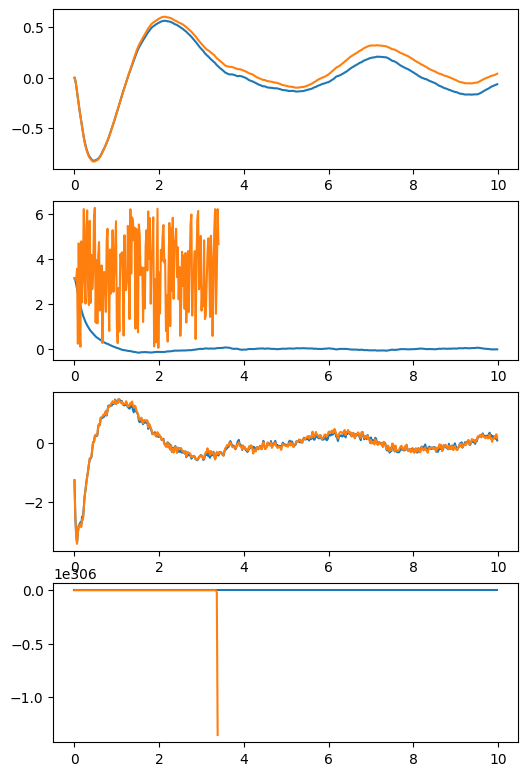

-0.039772884301810585 -3.5156090759703362 -0.026997015897370524 4.602177073922862e+180
-0.040312824619757937 -1.7058243635594657 0.009353977742605213 3.0293786314811917e+182
-0.04012574506490574 -4.529648556158971 0.002215824906128594 1.9940855698219224e+184
-0.040081428566783206 -4.0359994130484775 -0.01298478755236289 1.3126049079668202e+186
-0.040341124317830435 -5.162886786118282 -0.005517582013771144 8.64020917904966e+187
-0.04045147595810583 -5.6290040286406215 0.044859327730128795 5.687409379976283e+189
-0.03955428940350325 -3.9696736484942927 0.022574454901448687 3.743731752915735e+191
-0.039102800305474306 -4.088994603907641 0.020470918439059564 2.464307824777679e+193
-0.03869338193669314 -0.9155398446795919 0.024570275879102793 1.622128254923927e+195
-0.03820197641911105 -2.510715611254415 -0.0405800146373603 1.0677643632689966e+197
-0.03901357671185823 -0.4339681371653678 0.017122160229582573 7.028548649013664e+198
-0.038671133507266586 -3.6023422640093696 0.0242883155888549

In [332]:
parameter = np.genfromtxt('opt_state.csv')
t = np.arange(0,10,h)
fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(5,1,1)
ax1.plot(t,parameter.transpose()[0])
ax1.plot(t,p)
ax2 = fig.add_subplot(5,1,2)
ax2.plot(t,parameter.transpose()[1])
ax2.plot(t,angle_p)
zero = [t[i] for i in range(len(angle_p)) if abs(angle_p[i]) < 0.01 ]
if len(zero) != 0:
    ax2.vlines(zero[0], -3, 3,color='g', linestyles='dotted')
ax3 = fig.add_subplot(5,1,3)
ax3.plot(t,parameter.transpose()[2])
ax3.plot(t,[-1*i for i in vp])
ax4 = fig.add_subplot(5,1,4)
ax4.plot(t,parameter.transpose()[3])
ax4.plot(t,[-1*i for i in angle_vp])
if len(zero) != 0:
    ax4.vlines(zero[0], -11, 1,color='g', linestyles='dotted')
plt.show()
for i in range(100,200):
    print(parameter[i][0]-p[i],parameter[i][1]-angle_p[i],parameter[i][2]+vp[i],parameter[i][3]+angle_vp[i])

## 5. データ量とフィッティング精度

## 6. コスト関数の最小化する軌道周囲の予測精度

### コスト関数

In [18]:
def loss_cost(ddq,dq,q,ddz,dz):
    return  10* dz**2 + 500*(-np.cos(q)+1)**2 + dz**2 + 15*dq**2
    #20*dz*ddz + 1000*np.sin(q)*(-np.cos(q)+1) + 2*dz*ddz +30*dq*ddq

### 実行

In [19]:
p = []
angle_p = []
input_s = []
h = 0.02  #width
t = np.arange(0,3,h)

#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
v=1 #External input
for _ in t:
  input_s.append(v)
  ddz = Calculate_ddz(dz,v)
  dz += ddz * h
  z += dz * h
  p.append(z)
  #print(z)
  #print(ddz)
  ddq = Calculate_ddq(dq, q, ddz)
  dq += ddq * h
  q += dq * h
  v = 0
  """if q > np.pi or q < np.pi:
    times = q // 2*np.pi
    if q > np.pi:
      q -= 2*np.pi * times
    elif q < -np.pi:
      q += 2*np.pi * times
 """
  angle_p.append(q)
  #print(ddq)

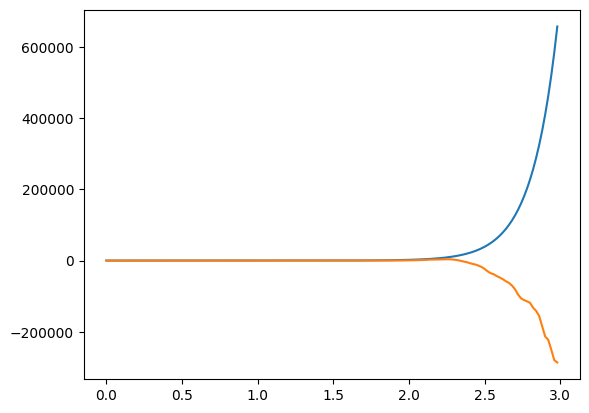

In [20]:
plt.plot(t,p)
plt.plot(t,angle_p)
#plt.plot(t,input_s)
plt.show()